# Joining data

Quite often one encounters a situation where data is not stored in one table, but in multiple with some shared columns.

In these situations you can use join-functions like `inner_join`, `left_join`, `right_join` etc. to join the tables based on values in some column.


Let's say that we want check the effect of weather on crime in Vancouver. From Kaggle we get a data set of hourly weather data of cities in US and Canada and a data set of crime in Vancouver.[[1]](https://www.kaggle.com/selfishgene/historical-hourly-weather-data) [[2]](https://www.kaggle.com/wosaku/crime-in-vancouver)

The weather-data is organized in individual .csv-files with data for a city stored in column named after the city. 

In [13]:
library(tidyverse)

temperature_vancouver <- read_csv('historical-hourly-weather-data/temperature.csv') %>%
    # Remove hours from datetime
    mutate(date=format(datetime,'%Y-%m-%d')) %>%    
    # Covert date-variables into Date-objects
    mutate(date=as.Date(date)) %>%
    # Take only Vancouver column and date
    select(date,temperature=Vancouver) %>%
    # Remove nan's from temperature
    filter(!is.na(temperature)) %>%
    # Convert temperature from K to C
    mutate(temperature=temperature - 272.15) %>%
    # Group by date
    group_by(date) %>%
    # Get the mean temperature of each day
    summarize_all(mean)

print(temperature_vancouver)

Parsed with column specification:
cols(
  .default = col_double(),
  datetime = col_datetime(format = "")
)
See spec(...) for full column specifications.


# A tibble: 1,854 x 2
   date       temperature
   <date>           <dbl>
 1 2012-10-01        12.5
 2 2012-10-02        14.0
 3 2012-10-03        13.4
 4 2012-10-04        12.2
 5 2012-10-05        11.6
 6 2012-10-06        12.7
 7 2012-10-07        13.4
 8 2012-10-08        13.8
 9 2012-10-09        13.8
10 2012-10-10        12.8
# ... with 1,844 more rows


The crime-statistics are stored in a .csv-file with times given as individual column. To parse a single date from the columns we use `make_date`-function from `lubridate`-package [[make_date]](https://www.rdocumentation.org/packages/lubridate/versions/1.7.3/topics/make_datetime).

After this `tally` is used to calculate the number of observations per date [[tally]](https://dplyr.tidyverse.org/reference/tally.html).

In [16]:
crimes_vancouver <- read_csv('vancouver-crime/crime.csv') %>%
    # Convert individual columns into a date
    mutate(date=make_date(YEAR,MONTH,DAY)) %>%
    # Arrange and group based on date
    arrange(date) %>%
    group_by(date) %>%
    # Calculate number of crimes / date
    tally()

print(crimes_vancouver)

Parsed with column specification:
cols(
  TYPE = col_character(),
  YEAR = col_integer(),
  MONTH = col_integer(),
  DAY = col_integer(),
  HOUR = col_integer(),
  MINUTE = col_integer(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  Latitude = col_double(),
  Longitude = col_double()
)


# A tibble: 5,308 x 2
   date           n
   <date>     <int>
 1 2003-01-01   191
 2 2003-01-02   148
 3 2003-01-03   160
 4 2003-01-04   146
 5 2003-01-05   120
 6 2003-01-06   139
 7 2003-01-07   155
 8 2003-01-08   156
 9 2003-01-09   128
10 2003-01-10   173
# ... with 5,298 more rows


Now we want to join the datasets based on the dates that are present in both datasets. For this let's use `inner_join` [[inner_join]](https://dplyr.tidyverse.org/reference/join.html).

After joing the data we can visualize the results as a scatter plot.

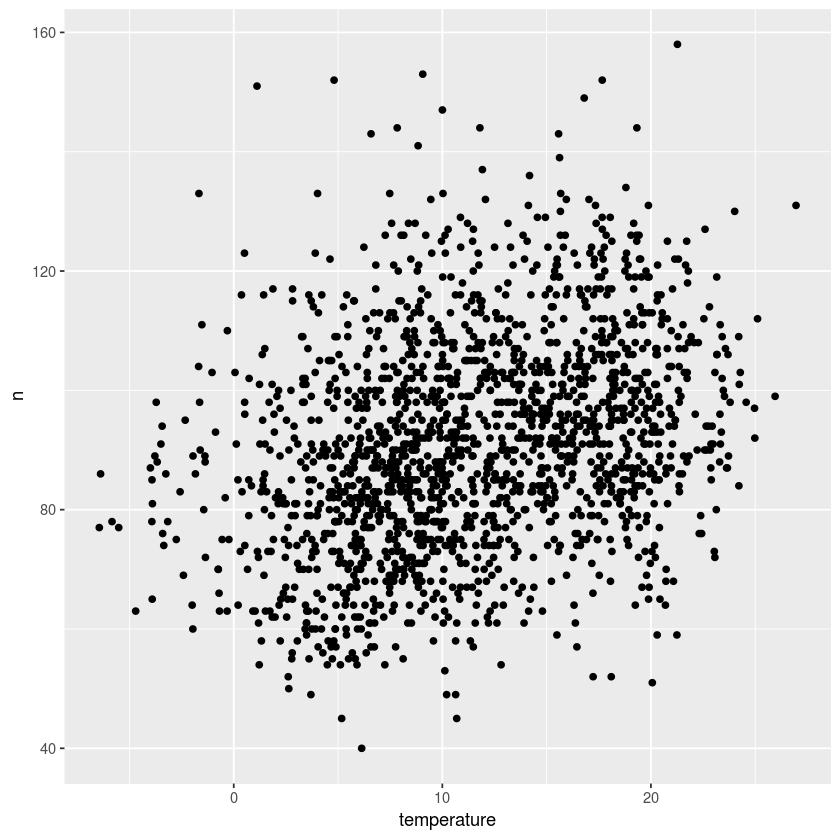

In [15]:
crime_temperature <- inner_join(crimes_vancouver,temperature_vancouver,by=c('date'))

crime_temperature %>%
    ggplot(aes(x=temperature,y=n)) +
    geom_point()

Apparently crime happens in Vancouver in all temperatures.